In [1]:
# from datetime import datetime
# import datetime as dt
# import pandas_datareader as web
# from pandas_datareader.data import DataReader
# import yfinance as yf
# import numpy as np
# import matplotlib.pyplot as plt
# import pandas as pd
# import seaborn as sns

# # sns.set_style('whitegrid')
# # plt.style.use('fivethirtyeight')
# %matplotlib inline

# YEARS = 17

# techlist = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
# end = datetime.now()
# start = datetime(end.year - YEARS, end.month, end.day)

# for stock in techlist:
#     globals()[stock] = yf.download(stock, start, end)

# LSTM

In [2]:
from datetime import datetime
import datetime as dt
import pandas_datareader as web
from pandas_datareader.data import DataReader
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# sns.set_style('whitegrid')
# plt.style.use('fivethirtyeight')
%matplotlib inline

YEARS = 17
end = datetime.now()
start = datetime(end.year - YEARS, end.month, end.day)

In [3]:
df = DataReader('GOOG', data_source='yahoo', start=datetime(end.year - YEARS, end.month, end.day), end=datetime.now())
# df = pd.read_csv('google_aug20-2004-to-jun26-2022.csv')
data = df.filter(['Close'])
dataset = data.values

train_size = int(np.ceil(len(dataset) * .80))

train_size

3424

In [4]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2005-07-05,147.437363,144.573105,145.504608,147.302872,15044179.0,147.302872
2005-07-06,148.244339,145.145950,148.094910,145.215698,16060574.0,145.215698
2005-07-07,147.347702,143.716309,144.154678,147.218185,21424203.0,147.218185
2005-07-08,148.194534,146.475967,147.571869,147.561905,14971106.0,147.561905
2005-07-11,147.746216,144.966629,147.646591,146.127274,16843498.0,146.127274
...,...,...,...,...,...,...
2022-06-27,2385.000000,2320.014893,2378.699951,2332.449951,1642000.0,2332.449951
2022-06-28,2357.129883,2248.879883,2327.020020,2251.429932,1411600.0,2251.429932
2022-06-29,2273.290039,2231.080078,2242.969971,2245.129883,931400.0,2245.129883


Text(0.5, 1.0, 'Closing Price of Google')

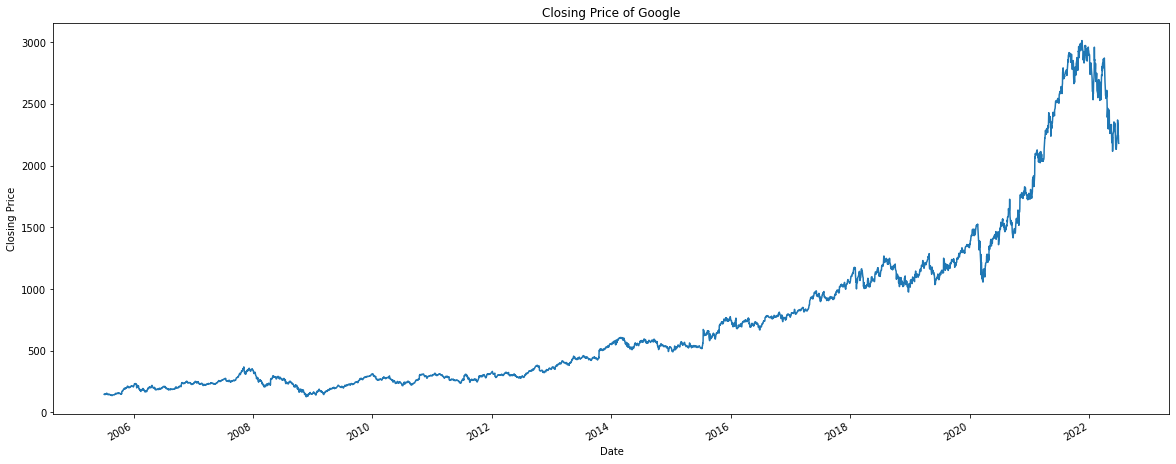

In [5]:
plt.figure(figsize=(20,8))

df['Close'].plot()
plt.ylabel('Closing Price')
plt.title("Closing Price of Google")

In [6]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2005-07-05,147.437363,144.573105,145.504608,147.302872,15044179.0,147.302872
2005-07-06,148.244339,145.145950,148.094910,145.215698,16060574.0,145.215698
2005-07-07,147.347702,143.716309,144.154678,147.218185,21424203.0,147.218185
2005-07-08,148.194534,146.475967,147.571869,147.561905,14971106.0,147.561905
2005-07-11,147.746216,144.966629,147.646591,146.127274,16843498.0,146.127274
...,...,...,...,...,...,...
2022-06-27,2385.000000,2320.014893,2378.699951,2332.449951,1642000.0,2332.449951
2022-06-28,2357.129883,2248.879883,2327.020020,2251.429932,1411600.0,2251.429932
2022-06-29,2273.290039,2231.080078,2242.969971,2245.129883,931400.0,2245.129883


Text(0.5, 1.0, 'Sales Volume of Google')

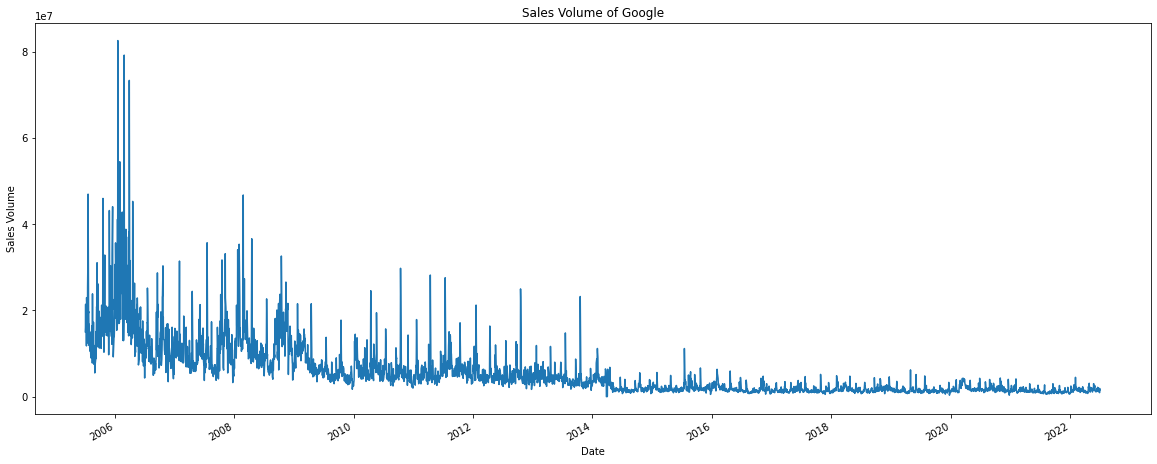

In [7]:
plt.figure(figsize=(20,8))
df['Volume'].plot()
plt.ylabel('Sales Volume')
plt.title("Sales Volume of Google")

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_dataset = scaler.fit_transform(dataset)
scaled_dataset

array([[0.00660566],
       [0.00588244],
       [0.00657631],
       ...,
       [0.73351841],
       [0.71353188],
       [0.7115118 ]])

In [9]:
train_data = scaled_dataset[0:int(train_size), :]
prediction_days = 60 #time steps (stamps)

x_train, y_train = [], []

for i in range(prediction_days, len(train_data)):
    x_train.append(train_data[i-prediction_days:i, 0])
    y_train.append(train_data[i, 0])
    if i <= (prediction_days + 1):
        print(x_train)
        print(y_train)
        print()
    

x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.00660566, 0.00588244, 0.00657631, 0.00669542, 0.0061983 ,
       0.00592732, 0.00714937, 0.00749976, 0.00755154, 0.00726674,
       0.00905495, 0.00941742, 0.00975228, 0.0077604 , 0.00662982,
       0.00667125, 0.00681624, 0.0062242 , 0.00523343, 0.00589797,
       0.00720633, 0.00688011, 0.00695432, 0.0060257 , 0.00583584,
       0.00589107, 0.00487441, 0.00459306, 0.00557175, 0.00458444,
       0.00486923, 0.0047743 , 0.00389228, 0.00389401, 0.00286009,
       0.00382151, 0.0043376 , 0.00434106, 0.00451194, 0.00535253,
       0.00514886, 0.00492965, 0.0049728 , 0.00535253, 0.00512124,
       0.00646067, 0.00655042, 0.00718907, 0.00902733, 0.00936219,
       0.00786396, 0.00779837, 0.00738066, 0.00800032, 0.00871146,
       0.00940016, 0.00930868, 0.00999738, 0.00981097, 0.00975228])]
[0.008381784114113604]

[array([0.00660566, 0.00588244, 0.00657631, 0.00669542, 0.0061983 ,
       0.00592732, 0.00714937, 0.00749976, 0.00755154, 0.00726674,
       0.00905495, 0.00941742, 0.0

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.callbacks import ModelCheckpoint, EarlyStopping

DROPOUT_UNIT = 0.2

def LSTM_Exp():
    model = Sequential()

    model.add(LSTM(units = 128, return_sequences = True, input_shape = (x_train.shape[1], 1)))
    model.add(Dropout(DROPOUT_UNIT))

    model.add(LSTM(units = 64, return_sequences= True))
    model.add(Dropout(DROPOUT_UNIT))

    model.add(LSTM(units= 64, return_sequences= True))
    model.add(Dropout(DROPOUT_UNIT))
    
    model.add(LSTM(units= 64, return_sequences= True))
    model.add(Dropout(DROPOUT_UNIT))
    
    model.add(LSTM(units= 64, return_sequences= True))
    model.add(Dropout(DROPOUT_UNIT))
    
    model.add(LSTM(units = 64))
    model.add(Dropout(DROPOUT_UNIT))

    model.add(Dense(units=1))

    return model

In [11]:
model = LSTM_Exp()
model.summary()
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 128)           66560     
                                                                 
 dropout (Dropout)           (None, 60, 128)           0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 64)            49408     
                                                                 
 dropout_1 (Dropout)         (None, 60, 64)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 64)            33024     
                                                                 
 dropout_2 (Dropout)         (None, 60, 64)            0         
                                                                 
 lstm_3 (LSTM)               (None, 60, 64)            3

In [12]:
def f1_score(new_pred, new_ytest):
    TP = 0
    FN = 0
    FP = 0

    for i in range(len(new_pred) - 1):
        test_prof = new_ytest[i+1] - new_ytest[i]
        p_prof = new_pred[i+1] - new_pred[1]
        if((test_prof>=0) and (p_prof>=0)):
            TP=TP+1
        if ((test_prof>= 0) and (p_prof<0)):
            FN=FN+1
        if ((test_prof<0) and (p_prof>=0)):
            FP=FP+1
    
    precision = float(TP) / float(TP+FP)
    recall = float(TP) / float(TP+FN)
    f1 = 2.0 * precision * recall / (precision + recall)
    print('PRECISION SCORE: %.5f' % (recall))
    print('RECALL SCORE: %.5f' % (precision))
    print('F1 SCORE: %.5f' % (f1))
    return f1, precision, recall
    

In [13]:
# checkpoint = ModelCheckpoint(filepath = 'weights_best.hdf5', 
#                                verbose = 2, 
#                                save_best_only = True)
EPOCHS = 50
BATCH_SIZE = 64

model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE)

Epoch 1/50
53/53 [==============================] - 12s 117ms/step - loss: 0.0022 - accuracy: 2.9727e-04
Epoch 2/50
53/53 [==============================] - 6s 121ms/step - loss: 3.5890e-04 - accuracy: 2.9727e-04
Epoch 3/50
53/53 [==============================] - 6s 121ms/step - loss: 3.3629e-04 - accuracy: 2.9727e-04
Epoch 4/50
53/53 [==============================] - 6s 120ms/step - loss: 2.8216e-04 - accuracy: 2.9727e-04
Epoch 5/50
53/53 [==============================] - 7s 124ms/step - loss: 2.8206e-04 - accuracy: 2.9727e-04
Epoch 6/50
53/53 [==============================] - 6s 123ms/step - loss: 2.5675e-04 - accuracy: 2.9727e-04
Epoch 7/50
53/53 [==============================] - 6s 122ms/step - loss: 2.7171e-04 - accuracy: 2.9727e-04
Epoch 8/50
53/53 [==============================] - 7s 125ms/step - loss: 2.3608e-04 - accuracy: 2.9727e-04
Epoch 9/50
53/53 [==============================] - 7s 127ms/step - loss: 2.3654e-04 - accuracy: 2.9727e-04
Epoch 10/50
53/53 [============

In [14]:
test_data = scaled_dataset[train_size - prediction_days: , :]
x_test = []
y_test = dataset[train_size:, :]
for i in range(prediction_days, len(test_data)):
    x_test.append(test_data[i-prediction_days:i, 0])


x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

new_ytest = scaler.inverse_transform(y_test)

rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))

rmse

258.18184533492524

In [15]:
f1, precision, recall = f1_score(predictions, new_ytest)

PRECISION SCORE: 0.97689
RECALL SCORE: 0.55689
F1 SCORE: 0.70938


In [16]:
# Plot the data
train = data[:train_size]
valid = data[train_size:]
valid['Predictions'] = predictions

C:\Users\ADRIC\AppData\Local\Temp\ipykernel_91544\764954721.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


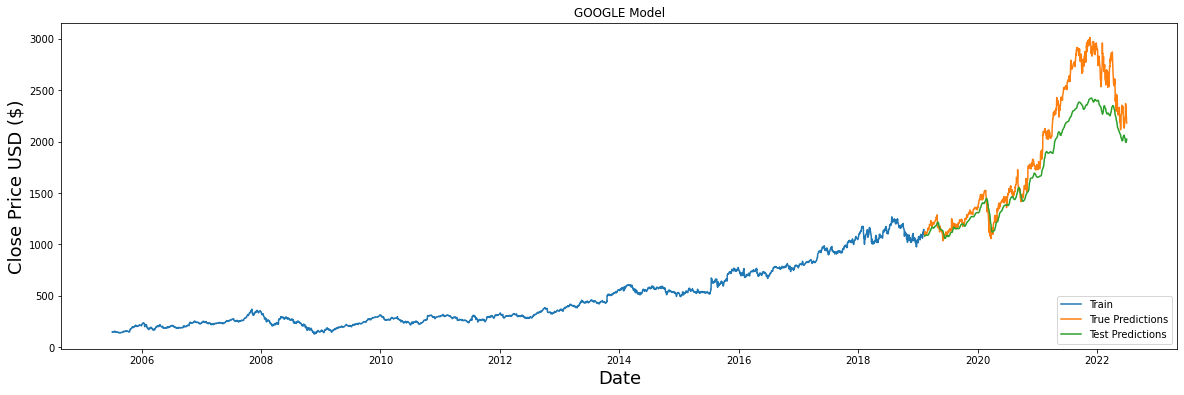

In [17]:
plt.figure(figsize=(20,6))
plt.title('GOOGLE Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'True Predictions', 'Test Predictions'], loc='lower right')
plt.show()

In [18]:
print(len(train))
print(len(valid))
print(len(train) + len(valid))
print(len(data))

3424
855
4279
4279


In [19]:
df.head()
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2005-07-05,147.437363,144.573105,145.504608,147.302872,15044179.0,147.302872
2005-07-06,148.244339,145.145950,148.094910,145.215698,16060574.0,145.215698
2005-07-07,147.347702,143.716309,144.154678,147.218185,21424203.0,147.218185
2005-07-08,148.194534,146.475967,147.571869,147.561905,14971106.0,147.561905
2005-07-11,147.746216,144.966629,147.646591,146.127274,16843498.0,146.127274
...,...,...,...,...,...,...
2022-06-27,2385.000000,2320.014893,2378.699951,2332.449951,1642000.0,2332.449951
2022-06-28,2357.129883,2248.879883,2327.020020,2251.429932,1411600.0,2251.429932
2022-06-29,2273.290039,2231.080078,2242.969971,2245.129883,931400.0,2245.129883


In [20]:
train

,Close
Date,
2005-07-05,147.302872
2005-07-06,145.215698
2005-07-07,147.218185
2005-07-08,147.561905
2005-07-11,146.127274
...,...
2019-02-04,1132.800049
2019-02-05,1145.989990
2019-02-06,1115.229980


In [21]:
valid

,Close,Predictions
Date,,
2019-02-11,1095.010010,1079.575684
2019-02-12,1121.369995,1084.177246
2019-02-13,1120.160034,1087.117920
2019-02-14,1121.670044,1088.495728
2019-02-15,1113.650024,1088.809570
...,...,...
2022-06-27,2332.449951,1992.486816
2022-06-28,2251.429932,1995.190796
2022-06-29,2245.129883,2003.000366
